In [4]:
import cv2

# Load the video file
cap = cv2.VideoCapture("video.mp4")

# Check if the video opened correctly
if not cap.isOpened():
    print("Error: Could not open video file.")
    exit()

# Read and display video frames
while True:
    ret, frame = cap.read()

    if not ret:
        break   # No more frames -> exit loop

    cv2.imshow("Video", frame)

    # Press Q to quit
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
cv2.destroyAllWindows()

Playing a video using OpenCV

Click response on video output using Events in OpenCV 

In [13]:
import cv2


def mouse_click(event, x, y, flags, param):
    # to check if left mouse button was clicked
    if event == cv2.EVENT_LBUTTONDOWN:
        print("left click")
        cv2.imwrite("frame.jpg", param)

    # to check if right mouse button was clicked
    if event == cv2.EVENT_RBUTTONDOWN:
        print("right click")
        cv2.imshow("Current Frame", frame)


cap = cv2.VideoCapture("video.mp4")

if cap.isOpened() == False:
    # give error message
    print("Error in opening file.")
else:
    # proceed forward
    while(cap.isOpened()):
        ret, frame = cap.read()
        if ret == True:
            cv2.imshow("GFG", frame)
            cv2.setMouseCallback('GFG', mouse_click, param=frame)
            if cv2.waitKey(25) & 0xFF == ord('q'):
                break
        else:
            break


cap.release()
cv2.destroyAllWindows()

left click
right click
left click
left click
left click
right click


Display date and time in videos using OpenCV

In [33]:
import cv2
import datetime

vid = cv2.VideoCapture('video.mp4')
while vid.isOpened():
    ret, frame = vid.read()
    if not ret:
        break

    font = cv2.FONT_HERSHEY_SCRIPT_COMPLEX
    dt = str(datetime.datetime.now())
    frame = cv2.putText(frame, dt,
                        (100, 100),           # Position (x, y)
                        font, 2,             # Font and scale
                        (900, 155, 155),     # Color (B, G, R)
                        5,                   # Thickness
                        cv2.LINE_8)          # Line type

    cv2.imshow('Video with Date & Time', frame)

    key = cv2.waitKey(1)
    if key == ord('q') or key == 27:  # Quit on 'q' or ESC
        break

vid.release()
cv2.destroyAllWindows()

Get video duration using Python - OpenCV

In [29]:
import cv2
import datetime

video = cv2.VideoCapture('video.mp4')
frames = video.get(cv2.CAP_PROP_FRAME_COUNT)
fps = video.get(cv2.CAP_PROP_FPS)

seconds = round(frames / fps)
video_time = datetime.timedelta(seconds=seconds)

print(f"Frames: {frames}")
print(f"FPS: {fps}")
print(f"Duration in seconds: {seconds}")
print(f"Video time (HH:MM:SS): {video_time}")

Frames: 423.0
FPS: 29.97002997002997
Duration in seconds: 14
Video time (HH:MM:SS): 0:00:14


Converting Color video to grayscale using OpenCV in Python

In [30]:
import cv2

# reading the video
source = cv2.VideoCapture('video.mp4')

# running the loop
while True:

    # extracting the frames
    ret, img = source.read()
    
    # converting to gray-scale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # displaying the video
    cv2.imshow("Live", gray)

    # exiting the loop
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break
    
# closing the window
cv2.destroyAllWindows()
source.release()

Original Image


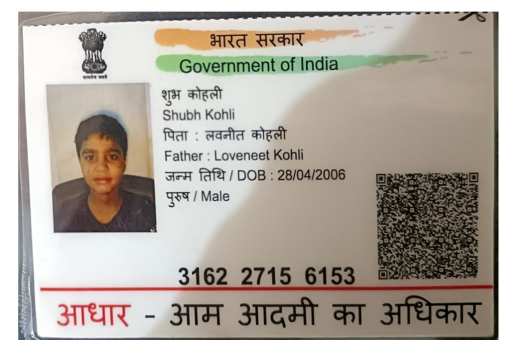

Blured Image


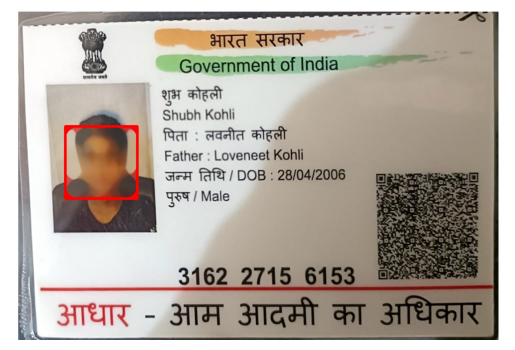

In [36]:
# Importing libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Reading an image using OpenCV and
# Converting it into a
# RGB image because OpenCV reads
# images by default in BGR format
image = cv2.cvtColor(cv2.imread('Untitled.jpg'),
                     cv2.COLOR_BGR2RGB)

# Display the Original Image
print('Original Image')
plt.imshow(image, cmap="gray")
plt.axis('off')
plt.show()

cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
face_data = cascade.detectMultiScale(image,
                                     scaleFactor=2.0,
                                     minNeighbors=4)
for x, y, w, h in face_data:
    # Draw a border around the detected face in Red
    # colour with a thickness 5.
    image = cv2.rectangle(image, (x, y), (x+w, y+h), 
                          (255, 0, 0), 5)
    image[y:y+h, x:x+w] = cv2.medianBlur(image[y:y+h,
                                               x:x+w], 
                                         35)

# Display the Blured Image
print('Blured Image')
plt.imshow(image, cmap="gray")
plt.axis('off')
plt.show()